In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df = pd.read_excel('data/IncidentiModificato.xlsx', index_col='VERBALE')

X = df[['SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Tot Testa', 'Tot Torace', 'Tot Addome', 'Tot Scheletro']]
y = df['Mezzo']

sc = StandardScaler()
X_std = sc.fit_transform(X)

In [3]:
import warnings
warnings.filterwarnings("ignore")

def get_accuracies(X, y, params): 
    accuracies = {'n_data' : [], 'activation': [], 'hidden layer sizes' : [], 'best score' : []}

    mlp = MLPClassifier(learning_rate_init=0.001, max_iter=5000, learning_rate="adaptive")
    clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5)
    clf.fit(X,y)

    accuracies['n_data'].append(len(y))
    accuracies['activation'].append(clf.best_estimator_.activation)
    accuracies['hidden layer sizes'].append(clf.best_estimator_.hidden_layer_sizes)
    accuracies['best score'].append(clf.best_score_)

    for n_data in [x for x in range(200,2000,100)] + [2**e for e in range(11,17)]:

        smote = SMOTE(sampling_strategy={0 : int(n_data/2), 1 : int(n_data/2)})
        X_os, y_os = smote.fit_resample(X, y) 

        X_os_std = StandardScaler().fit_transform(X_os)

        mlp = MLPClassifier(learning_rate_init=0.001, max_iter=5000, learning_rate="adaptive")
        clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5)
        clf.fit(X_os_std,y_os)

        accuracies['n_data'].append(len(y_os))
        accuracies['activation'].append(clf.best_estimator_.activation)
        accuracies['hidden layer sizes'].append(clf.best_estimator_.hidden_layer_sizes)
        accuracies['best score'].append(clf.best_score_)

    return pd.DataFrame(accuracies)

In [4]:
params = { 'activation': ['relu', 'logistic', 'tanh'],
          'hidden_layer_sizes' : [(2), (3,3), (5), (6,3), (5,5),(6), (8), (10)]}

accuracies = get_accuracies(X, y, params)
accuracies

,n_data,activation,hidden layer sizes,best score
0,130,relu,6,0.653846
1,200,tanh,8,0.760000
2,300,tanh,"(6, 3)",0.786667
3,400,tanh,10,0.835000
4,500,tanh,10,0.858000
5,600,tanh,10,0.880000
6,700,tanh,10,0.874286
7,800,tanh,8,0.872500
8,900,tanh,10,0.903333
9,1000,relu,10,0.902000


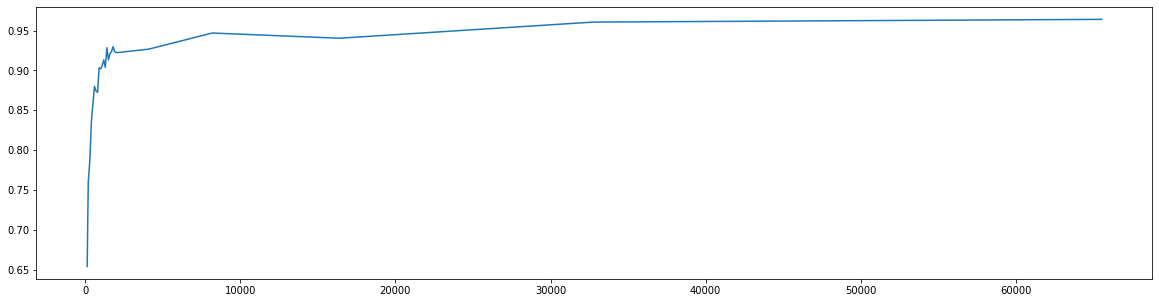

In [5]:
plt.figure(figsize=(20,5))
plt.plot(accuracies['n_data'], accuracies['best score'])
plt.show()

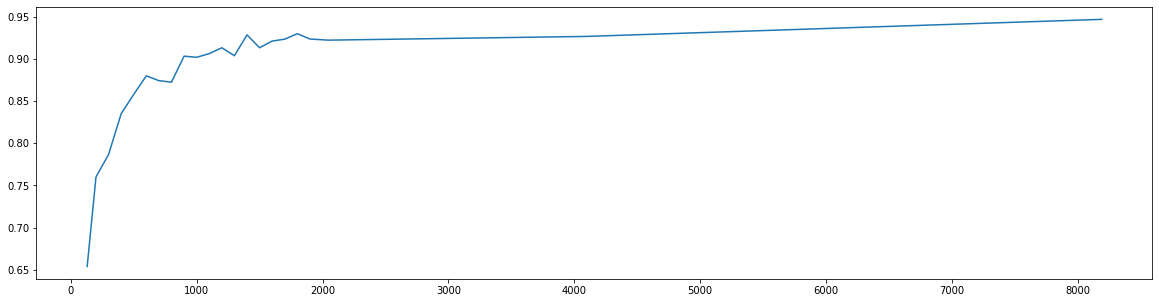

In [6]:
plt.figure(figsize=(20,5))
plt.plot(accuracies['n_data'][:-3], accuracies['best score'][:-3])
plt.show()

In [7]:
params = {'activation': ['relu', 'logistic', 'tanh'],
          'hidden_layer_sizes' : [(2), (3,3), (5), (6,3), (5,5),(6), (8), (10), (20), (30), (50)]}

accuracies = get_accuracies(X, y, params)
accuracies

,n_data,activation,hidden layer sizes,best score
0,130,logistic,20,0.653846
1,200,tanh,20,0.795000
2,300,tanh,50,0.863333
3,400,tanh,20,0.907500
4,500,tanh,50,0.932000
5,600,tanh,50,0.943333
6,700,tanh,50,0.955714
7,800,relu,30,0.950000
8,900,tanh,50,0.948889
9,1000,tanh,50,0.959000


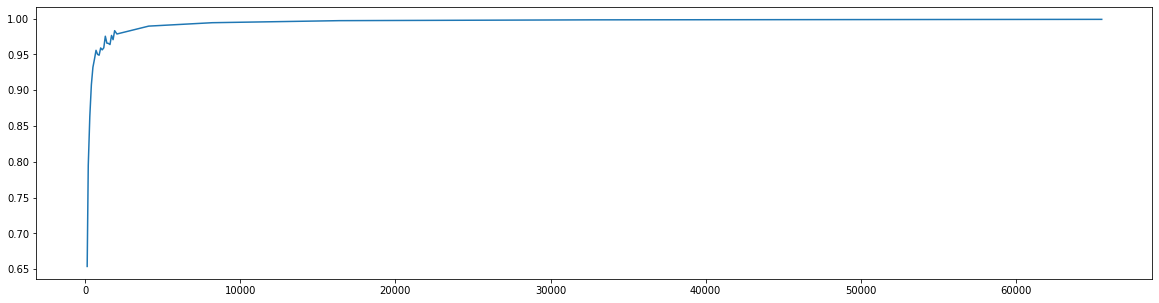

In [8]:
plt.figure(figsize=(20,5))
plt.plot(accuracies['n_data'], accuracies['best score'])
plt.show()

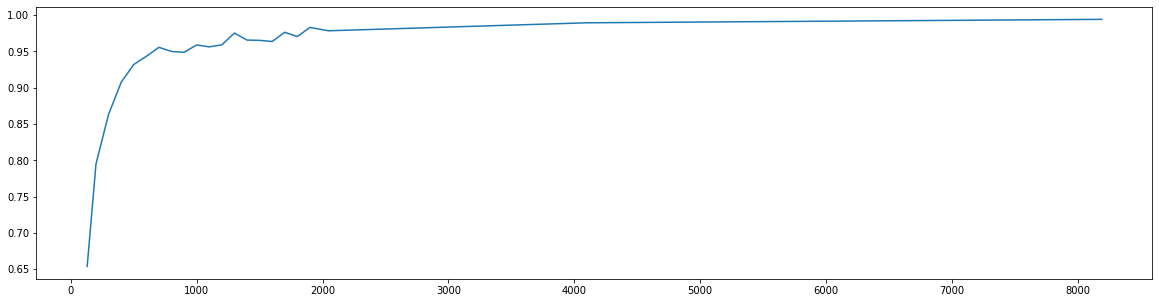

In [9]:
plt.figure(figsize=(20,5))
plt.plot(accuracies['n_data'][:-3], accuracies['best score'][:-3])
plt.show()

In [10]:
def get_summary(X, y):
    activations = ['relu', 'logistic', 'tanh']
    hidden_layers = [(2), (3,3), (5), (6,3), (5,5),(6), (8), (10), (2,2,2)]

    summary = {"Activation" : [], "Hidden layer sizes" : [], "Scores" : [], "Mean score" : [], "Scores std" : []}

    for activation in activations:
        for hidden_layer in hidden_layers:
            mlp = MLPClassifier(activation=activation, hidden_layer_sizes=hidden_layer, learning_rate_init=0.001, max_iter=5000, learning_rate="adaptive")

            scores = cross_val_score(mlp, X, y)

            summary["Scores"].append(list(map(lambda x : round(x, 3), scores)))
            summary["Mean score"].append(round(scores.mean(), 3))
            summary["Scores std"].append(round(scores.std(), 3))
            summary["Activation"].append(activation)
            summary["Hidden layer sizes"].append(hidden_layer)

    summ = pd.DataFrame(summary)
    return summ.sort_values('Mean score', ascending=False)

In [11]:
smote = SMOTE(sampling_strategy={0 : 200, 1 : 200})
X_os, y_os = smote.fit_resample(X, y)

seed = np.random.randint(0,10000)
X_test, y_test = X_os[130:].sample(n=130, random_state=seed), y_os[130:].sample(n=130, random_state=seed)

In [12]:
get_summary(X_test, y_test)

,Activation,Hidden layer sizes,Scores,Mean score,Scores std
25,tanh,10,"[0.885, 0.769, 0.731, 0.885, 0.731]",0.800,0.071
15,logistic,8,"[0.846, 0.808, 0.769, 0.808, 0.769]",0.800,0.029
14,logistic,6,"[0.885, 0.731, 0.731, 0.846, 0.808]",0.800,0.062
24,tanh,8,"[0.885, 0.808, 0.692, 0.846, 0.731]",0.792,0.071
16,logistic,10,"[0.808, 0.808, 0.692, 0.846, 0.769]",0.785,0.052
7,relu,10,"[0.731, 0.769, 0.731, 0.769, 0.846]",0.769,0.042
5,relu,6,"[0.654, 0.808, 0.692, 0.731, 0.846]",0.746,0.071
11,logistic,5,"[0.808, 0.808, 0.5, 0.769, 0.731]",0.723,0.115
6,relu,8,"[0.538, 0.731, 0.731, 0.731, 0.808]",0.708,0.090
23,tanh,6,"[0.5, 0.808, 0.538, 0.885, 0.769]",0.700,0.153


# Data augmentation con funzione fatta da Manuel Dileo

In [13]:
def add_new_elements(error_distrib,n_elements,n_columns,dataset,\
                     label_col):
    
    x = error_distrib['x']
    px = error_distrib['px']
    
    count_elements = 0
    
    df_result = dataset
    
    eq_freq = []
    count_neq_label = 0
    
    while True:
        #Scelta elemento da cui partire
        from_item = np.random.choice(dataset.index)
        elem = dataset[dataset.index==from_item]
        new_index = ['F'+str(ind) for ind in list(elem.index)]
        elem.rename({from_item:'FAKE'+str(from_item)},inplace=True)
        
        
        #scelta colonne da perturbare
        columns = set()
        columns_to_extract = list(set(dataset.columns)-set([label_col]))
        while(len(columns)!=n_columns):
            extract = np.random.choice(columns_to_extract)
            columns.add(extract)
            columns_to_extract = list(set(columns_to_extract)-set([extract]))
        columns_list = list(columns)
        
                       
        #perturbazione
        for col in columns_list:
            #check rimanga in valori del dominio
            while True:
                perturbation = np.random.choice(x,p=px)
                new_value = elem.iloc[0][col]+perturbation
                if new_value >= 0 and new_value<=4: break
            elem[col]=new_value
        
        #check elementi uguali
        eq_list = [x for x,y in dataset.iterrows() if all(y==elem.iloc[0])]
        if len(eq_list)>0:
            eq_item = eq_list[0]
            eq_label = elem.iloc[0][label_col]\
                        == dataset.loc[eq_item][label_col] 
            eq_freq.append(count_elements)
            if not eq_label:
                count_neq_label+=1
            """
            warn("Creato un elemento già presente"+\
                " ho perturbato {} colonne".format(n_columns)+\
                " ho già creato {} elementi".format(count_elements)+\
                " px: {}".format(px)+\
                " label uguali: {}".format(eq_label))
            """
        else:
            count_elements+=1
            df_result = df_result.append(elem)
        
        if count_elements==n_elements: break
            
    return df_result,eq_freq,count_neq_label

In [14]:
def augment_data(df, n_data):
    raw_df = df.drop(columns=(['DATA', 'SESSO', 'ANNI', 'PESO', 'ALTEZZA', 'BMI', 'Tot Testa', 'Tot Torace', 'Tot Addome', 'Tot Scheletro', 'Totale']))

    error_distrib = {
        'x' : [-2,-1,0,1,2],
        'px' : [.1,.2,.4,.2,.1]
    }

    df_end, _, _ = add_new_elements(error_distrib, n_data - len(df), 3, raw_df, 'Mezzo')
    
    df_augmented = pd.DataFrame(df_end['Mezzo'])
    parti_corpo = ['Testa', 'Torace', 'Addome', 'Scheletro']
    sum_parte_corpo =  {'Testa' : [], 'Torace' : [], 'Addome' : [], 'Scheletro' : []}

    for index, row in df_end.iterrows():
        for parte_corpo in parti_corpo:
            sum_parte_corpo[parte_corpo].append(sum(row.filter(regex=parte_corpo+":")))


    for parte_corpo in parti_corpo:
        df_augmented['Tot ' + parte_corpo] = sum_parte_corpo[parte_corpo]
    
    X_augmented = df_augmented.drop(columns='Mezzo')
    y_augmented = df_augmented['Mezzo']
    
    return X_augmented, y_augmented

In [20]:
def get_accuracies_2(df, X, y, params): 
    accuracies = {'n_data' : [], 'activation': [], 'hidden layer sizes' : [], 'best score' : []}

    mlp = MLPClassifier(learning_rate_init=0.001, max_iter=5000, learning_rate="adaptive")
    clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5)
    clf.fit(X,y)

    accuracies['n_data'].append(len(y))
    accuracies['activation'].append(clf.best_estimator_.activation)
    accuracies['hidden layer sizes'].append(clf.best_estimator_.hidden_layer_sizes)
    accuracies['best score'].append(clf.best_score_)

    for n_data in [2**x for x in range(8,15)]:
        
        X_os, y_os = augment_data(df, n_data)

        X_os_std = StandardScaler().fit_transform(X_os)

        mlp = MLPClassifier(learning_rate_init=0.001, max_iter=5000, learning_rate="adaptive")
        clf = GridSearchCV(mlp, params, n_jobs=-1, cv=5)
        clf.fit(X_os_std,y_os)

        accuracies['n_data'].append(len(y_os))
        accuracies['activation'].append(clf.best_estimator_.activation)
        accuracies['hidden layer sizes'].append(clf.best_estimator_.hidden_layer_sizes)
        accuracies['best score'].append(clf.best_score_)

    return pd.DataFrame(accuracies)

In [21]:
acc = get_accuracies_2(df, X, y, params)

In [22]:
acc

,n_data,activation,hidden layer sizes,best score
0,130,logistic,8,0.646154
1,256,relu,20,0.679638
2,512,relu,50,0.732381
3,1024,relu,50,0.773439
4,2048,tanh,50,0.817873
5,4096,relu,50,0.814942
6,8192,tanh,50,0.820801
7,16384,logistic,50,0.835816


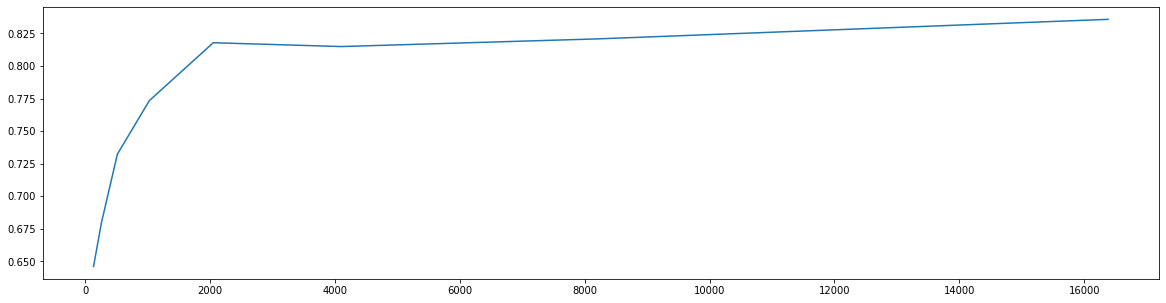

In [23]:
plt.figure(figsize=(20,5))
plt.plot(acc['n_data'], acc['best score'])
plt.show()